In [138]:
import json
import re
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [139]:
data = json.load(open('data.json', 'r'))

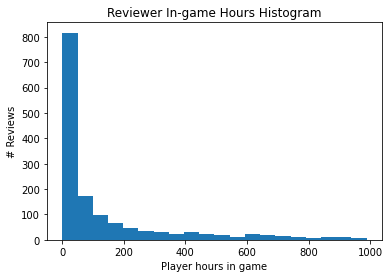

In [140]:
hrs_on_record = []
for game in data:
    hrs_on_record.extend([r['hrs_on_record'] for r in game['reviews']])
plt.figure()
plt.hist(hrs_on_record, bins=20)
plt.xlabel('Player hours in game')
plt.ylabel('# Reviews')
plt.title('Reviewer In-game Hours Histogram')
plt.show()

In [141]:
# Percentage of reviewers who played less than 200 hours
under_200 = len([x for x in hrs_on_record if x <= 200]) / len(hrs_on_record)
under_200 * 100

78.11653116531166

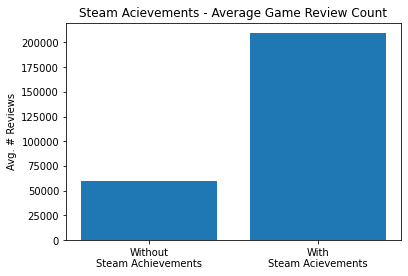

In [142]:
with_achievements = []
without_achievements = []

for game in data:
    if 'Steam Achievements' in game['game']['features']:
        with_achievements.append(game['game']['review_count'])
    else:
        without_achievements.append(game['game']['review_count'])

plt.bar([0,1], [np.mean(without_achievements), np.mean(with_achievements)])
plt.title('Steam Acievements - Average Game Review Count')
plt.xticks(ticks=[0,1], labels=['Without\nSteam Achievements', 'With\nSteam Acievements'])
plt.ylabel('Avg. # Reviews')
plt.show()

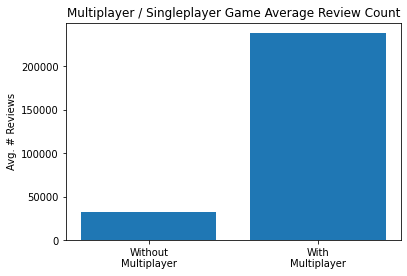

In [143]:
with_achievements = []
without_achievements = []

for game in data:
    if 'Multiplayer' in game['game']['tags']:
        with_achievements.append(game['game']['review_count'])
    else:
        without_achievements.append(game['game']['review_count'])

plt.bar([0,1], [np.mean(without_achievements), np.mean(with_achievements)])
plt.title('Multiplayer / Singleplayer Game Average Review Count')
plt.xticks(ticks=[0,1], labels=['Without\nMultiplayer', 'With\nMultiplayer'])
plt.ylabel('Avg. # Reviews')
plt.show()

In [144]:
helpful_text = data[0]['reviews'][1]['helpful']
print(helpful_text)
int(re.search(r'([0-9,]+) people found this review funny', helpful_text).group(1).replace(',',''))

312 people found this review helpful, 267 people found this review funny


267

In [157]:
def extract_helpful(helpful_text):
    try:
        return int(re.search(r'([0-9,]+) people found this review helpful', helpful_text).group(1).replace(',',''))
    except:
        return 0

def extract_funny(helpful_text):
    try:
        return int(re.search(r'([0-9,]+) people found this review funny', helpful_text).group(1).replace(',',''))
    except:
        return 0

def extract_price(price_text):
    try:
        return int(re.search(r'([0-9,]+)', price_text).group(1).replace(',',''))
    except:
        return 0


In [180]:
ratings = [i['game']['rating'] for i in data]
price = [extract_price(i['game']['price']) for i in data]
review_count = [i['game']['review_count'] for i in data]
is_multiplayer = [('Multiplayer' in i['game']['tags']) for i in data]
has_online_pvp = [('Online PvP' in i['game']['features']) for i in data]

mean_hrs_on_record = []
mean_review_rewards = []
mean_found_helpful = []
mean_found_funny = []
mean_recommendations = []
mean_review_length = []
for g in data:
    mean_hrs_on_record.append(np.mean([r['hrs_on_record'] for r in g['reviews']]))
    mean_review_rewards.append(np.mean([r['rewards'] for r in g['reviews']]))
    mean_found_helpful.append(np.mean([extract_helpful(r['helpful']) for r in g['reviews']]))
    mean_found_funny.append(np.mean([extract_funny(r['helpful']) for r in g['reviews']]))
    mean_recommendations.append(np.mean([r['recommendation'] == 'Recommended' for r in g['reviews']]))
    mean_review_length.append(np.mean([len(r['text']) for r in g['reviews']]))

vars_names = [
    'RATING',
    'PRICE',
    'REVIEW_COUNT',
    'MULTIPLAYER',
    'PVP',
    'HRS_ON_RECORD',
    'REVIEW_REWARDS',
    'FOUND_HELPFUL',
    # 'FOUND_FUNNY',
    'RECOMMENDATIONS',
    # 'REVIEW_LENGTH'
]

vars = np.stack(arrays=[
    ratings,
    price,
    review_count,
    is_multiplayer,
    has_online_pvp,
    mean_hrs_on_record,
    mean_review_rewards,
    mean_found_helpful,
    # mean_found_funny,
    mean_recommendations,
    # mean_review_length
])

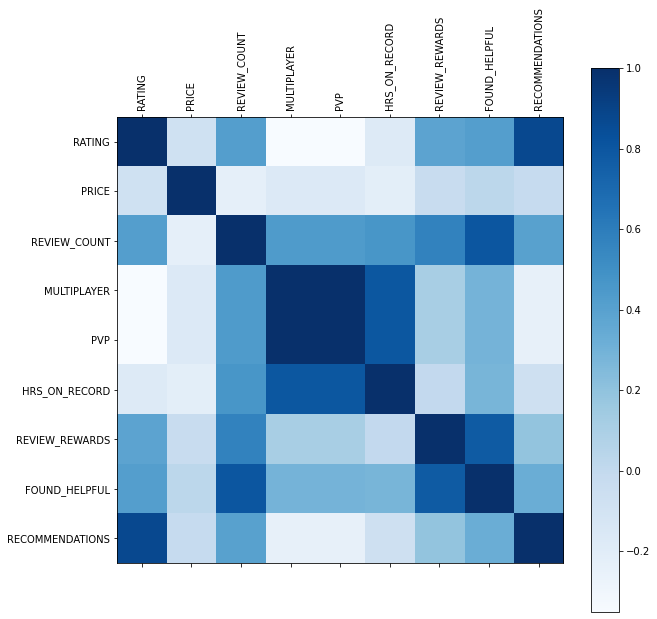

In [181]:
vars_pearson_correlation = np.corrcoef(vars)
vars_pearson_correlation
figure = plt.figure()
axes = figure.add_subplot(111)
caxes = axes.matshow(vars_pearson_correlation, cmap='Blues')
figure.colorbar(caxes)
axes.set_xticklabels(['']+vars_names, rotation=90)
axes.set_yticklabels(['']+vars_names)
figure.set_size_inches(10,10)
plt.show()

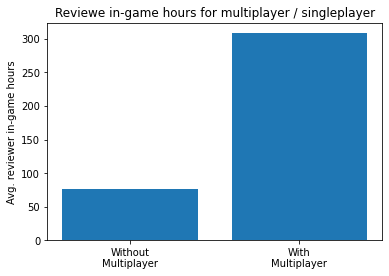

In [148]:
plt.figure()
plt.ylabel('Avg. reviewer in-game hours')
plt.xticks(ticks=[0,1], labels=['Without\nMultiplayer', 'With\nMultiplayer'])
plt.bar(is_multiplayer, mean_hrs_on_record)
plt.title('Reviewe in-game hours for multiplayer / singleplayer')
plt.show()

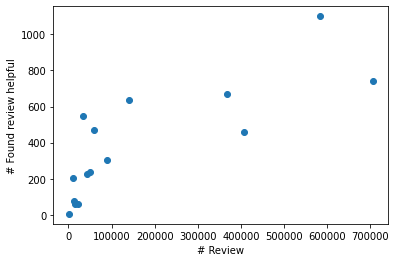

In [149]:
plt.figure()
plt.xlabel('# Review')
plt.ylabel('# Found review helpful')
plt.scatter(review_count, mean_found_helpful)
plt.title('')
plt.show()

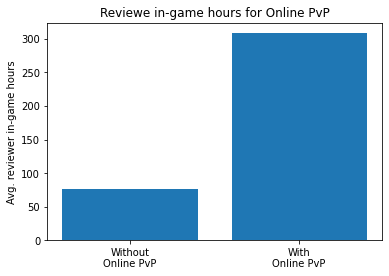

In [184]:
plt.figure()
plt.ylabel('Avg. reviewer in-game hours')
plt.xticks(ticks=[0,1], labels=['Without\nOnline PvP', 'With\nOnline PvP'])
plt.bar(has_online_pvp, mean_hrs_on_record)
plt.title('Reviewe in-game hours for Online PvP')
plt.show()

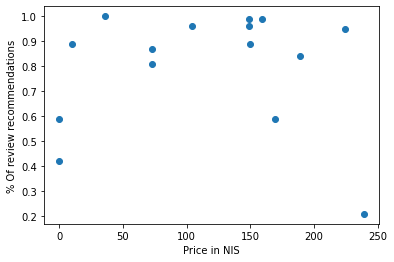

In [168]:
# Surprisingly not correlated
plt.figure()
plt.xlabel('Price in NIS')
plt.ylabel('% Of review recommendations')
plt.scatter(price, mean_recommendations)
plt.title('')
plt.show()

In [150]:
feature_count = defaultdict(int)

for game in data:
    for feature in game['game']['features']:
        feature_count[feature] += 1

for f in feature_count.keys():
    feature_count[f] = feature_count[f] / len(data)

feature_count

defaultdict(int,
            {'Cross-Platform Multiplayer': 0.13333333333333333,
             'Full controller support': 0.6666666666666666,
             'In-App Purchases': 0.4,
             'MMO': 0.2,
             'Online Co-op': 0.4666666666666667,
             'Online PvP': 0.6666666666666666,
             'Partial Controller Support': 0.06666666666666667,
             'Remote Play Together': 0.2,
             'Remote Play on Phone': 0.4,
             'Remote Play on TV': 0.4666666666666667,
             'Remote Play on Tablet': 0.7333333333333333,
             'Shared/Split Screen Co-op': 0.13333333333333333,
             'Shared/Split Screen PvP': 0.13333333333333333,
             'Single-player': 0.6666666666666666,
             'Stats': 0.13333333333333333,
             'Steam Achievements': 0.7333333333333333,
             'Steam Cloud': 0.5333333333333333,
             'Steam Leaderboards': 0.13333333333333333,
             'Steam Trading Cards': 0.5333333333333333,
        

In [151]:
tag_count = defaultdict(int)

for game in data:
    for tag in game['game']['tags']:
        tag_count[tag] += 1

for f in tag_count.keys():
    tag_count[f] = tag_count[f] / len(data)

tag_count

defaultdict(int,
            {'2D': 0.06666666666666667,
             '3D': 0.06666666666666667,
             'Action': 0.4,
             'Action-Adventure': 0.06666666666666667,
             'Adventure': 0.13333333333333333,
             'Anime': 0.2,
             'Arcade': 0.06666666666666667,
             'Atmospheric': 0.06666666666666667,
             'Basketball': 0.06666666666666667,
             'Battle Royale': 0.13333333333333333,
             'Blood': 0.06666666666666667,
             'Building': 0.2,
             'Card Battler': 0.06666666666666667,
             'Card Game': 0.06666666666666667,
             'Casual': 0.13333333333333333,
             'Character Customization': 0.06666666666666667,
             'Co-op': 0.2,
             'Competitive': 0.06666666666666667,
             'Controller': 0.06666666666666667,
             'Crafting': 0.13333333333333333,
             'Crime': 0.06666666666666667,
             'Cute': 0.13333333333333333,
             'Dark': 0.06

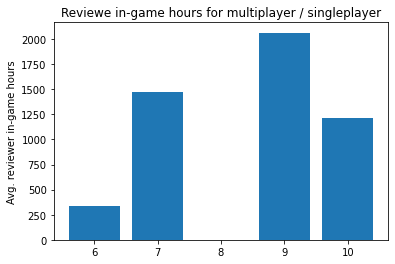

In [152]:
plt.figure()
plt.ylabel('Avg. reviewer in-game hours')
# plt.xticks(ticks=[0,1], labels=['Without\nMultiplayer', 'With\nMultiplayer'])
plt.bar(ratings, mean_review_length)
plt.title('Reviewe in-game hours for multiplayer / singleplayer')
plt.show()